<a href="https://colab.research.google.com/github/KenDaupsey/Propensity-Score-Matching-Using-Python/blob/main/Propensity_Score_Matching_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Propensity Score Matching Using Python ***

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Importing the dataset and displaying the first 5 rows

url= "https://raw.githubusercontent.com/KenDaupsey/Propensity-Score-Matching-Using-Python/main/Propensity%20Score%7EDataset.csv"
df= pd.read_csv(url)
df.head()

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome
0,1,57,0,1,1,144.300417
1,2,27,1,1,0,84.993181
2,3,65,0,1,0,158.664036
3,4,60,0,0,0,148.263475
4,5,46,1,2,0,120.771806


In [3]:
# Step 3: Exploring the data~1
df.describe()  # Displaying the data types of the columns

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,53.824100,0.651000,0.807600,0.500400,138.977511
std,2886.89568,20.993524,0.476678,0.817587,0.500025,42.057306
min,1.00000,18.000000,0.000000,0.000000,0.000000,59.998923
25%,2500.75000,36.000000,0.000000,0.000000,0.000000,102.658691
50%,5000.50000,54.000000,1.000000,1.000000,1.000000,138.953228
75%,7500.25000,72.000000,1.000000,2.000000,1.000000,175.180812
max,10000.00000,90.000000,1.000000,2.000000,1.000000,217.804103


In [4]:
# Step 3: Exploring the data
df.describe().T  # Displaying the summary statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
SubjectID,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Age,10000.0,53.824100,20.993524,18.000000,36.000000,54.000000,72.000000,90.000000
Gender,10000.0,0.651000,0.476678,0.000000,0.000000,1.000000,1.000000,1.000000
BaselineHealth,10000.0,0.807600,0.817587,0.000000,0.000000,1.000000,2.000000,2.000000
Treatment,10000.0,0.500400,0.500025,0.000000,0.000000,1.000000,1.000000,1.000000
Outcome,10000.0,138.977511,42.057306,59.998923,102.658691,138.953228,175.180812,217.804103


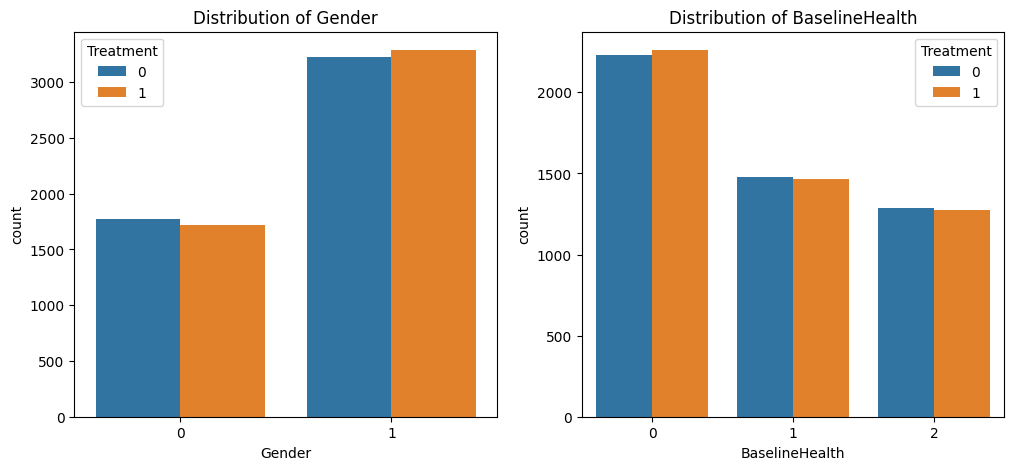

In [5]:
# Step 4: Visualizing the distribution of covariates
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x='Gender', hue='Treatment', data=df, ax=axes[0])  # Visualizing the distribution of Gender
axes[0].set_title('Distribution of Gender')
sns.countplot(x='BaselineHealth', hue='Treatment', data=df, ax=axes[1])  # Visualizing the distribution of BaselineHealth
axes[1].set_title('Distribution of BaselineHealth')
plt.show()

In [6]:
# Step 5: Splitting the data into treatment and control groups
treatment_df = df[df["Treatment"] == 1]  # Creating a subset for the treatment group
control_df = df[df["Treatment"] == 0]  # Creating a subset for the control group

In [7]:
df.shape

(10000, 6)

In [8]:
treatment_df.shape, control_df.shape

((5004, 6), (4996, 6))

In [9]:
# Step 6: Propensity score model using Logistic Regression
log_reg_model = LogisticRegression()  # Initializing the logistic regression model
X_log_reg = df[["Age", "Gender", "BaselineHealth"]]  # Independent variables for the model
y_log_reg = df["Treatment"]  # Dependent variable for the model
log_reg_model.fit(X_log_reg, y_log_reg)  # Fitting the logistic regression model

# Calculating and storing the propensity scores using Logistic Regression
df["PropensityScore_LogReg"] = log_reg_model.predict_proba(X_log_reg)[:, 1]

df["PropensityScore_LogReg"]

0       0.491009
1       0.508164
2       0.489837
3       0.493786
4       0.502164
          ...   
9995    0.503184
9996    0.498766
9997    0.508597
9998    0.510355
9999    0.502744
Name: PropensityScore_LogReg, Length: 10000, dtype: float64

In [10]:
# Step 7: Propensity score model using KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Initializing the KNN model
X_knn = df[["Age", "Gender", "BaselineHealth"]]  # Independent variables for the KNN model
y_knn = df["Treatment"]  # Dependent variable for the KNN model
knn_model.fit(X_knn, y_knn)  # Fitting the KNN model

# Calculating and storing the propensity scores using KNN
df["PropensityScore_KNN"] = knn_model.predict_proba(X_knn)[:, 1]
df['PropensityScore_KNN']

0       0.8
1       0.6
2       0.2
3       0.2
4       0.4
       ... 
9995    0.6
9996    0.6
9997    0.4
9998    1.0
9999    0.8
Name: PropensityScore_KNN, Length: 10000, dtype: float64

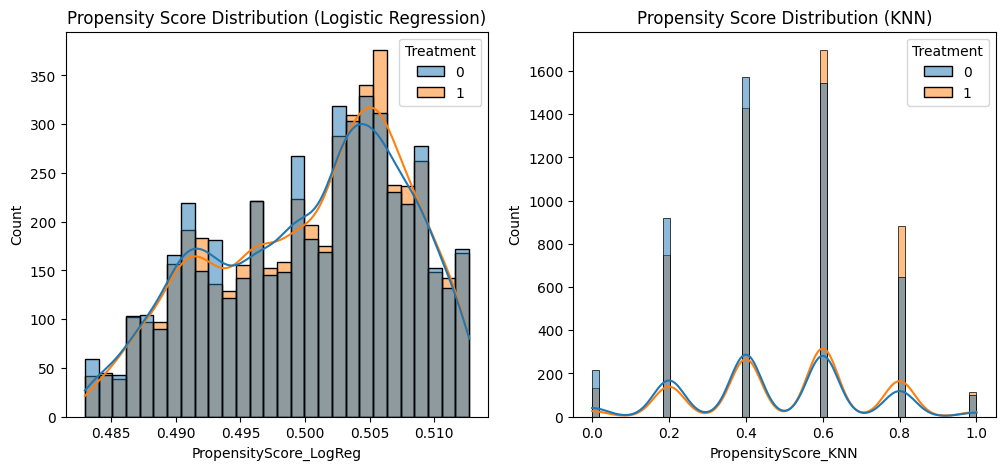

In [11]:
# Step 8: Visualizing the propensity scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(df, x='PropensityScore_LogReg', hue='Treatment', kde=True, ax=axes[0])  # Visualizing the propensity score distribution from Logistic Regression
axes[0].set_title('Propensity Score Distribution (Logistic Regression)')
sns.histplot(df, x='PropensityScore_KNN', hue='Treatment', kde=True, ax=axes[1])  # Visualizing the propensity score distribution from KNN
axes[1].set_title('Propensity Score Distribution (KNN)')
plt.show()

In [12]:
# Step 9: Propensity Score Matching
test_size_percentage = 0.5  # Adjusting the test size percentage
treated_matched, control_matched = train_test_split(control_df, test_size=test_size_percentage, random_state=42)  # Performing the matching

matched_df = pd.concat([treatment_df, treated_matched])  # Combining the treated and matched control groups

matched_df.head()

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome
0,1,57,0,1,1,144.300417
6,7,23,1,0,1,82.113379
7,8,53,1,0,1,140.338351
8,9,63,1,0,1,159.156130
9,10,32,1,0,1,99.270884


In [13]:
# Step 10: Evaluating the treatment effect
effect = matched_df["Outcome"].mean() - control_df["Outcome"].mean()  # Calculating the average treatment effect
print(f"Average Treatment Effect: {effect}")  # Displaying the average treatment effect

Average Treatment Effect: 0.9680754074285005


In [15]:
# Step 11: Fitting the logistic regression model using statsmodels
import statsmodels.api as sm
logit_model = sm.Logit(matched_df['Treatment'], sm.add_constant(matched_df[['Age', 'Gender', 'BaselineHealth']]))  # Initializing the logistic regression model using statsmodels
logit_result = logit_model.fit()  # Fitting the logistic regression model
print(logit_result.summary())  # Displaying the summary of the logistic regression model

Optimization terminated successfully.
         Current function value: 0.636244
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Treatment   No. Observations:                 7502
Model:                          Logit   Df Residuals:                     7498
Method:                           MLE   Df Model:                            3
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:               3.739e-05
Time:                        16:56:16   Log-Likelihood:                -4773.1
converged:                       True   LL-Null:                       -4773.3
Covariance Type:            nonrobust   LLR p-value:                    0.9490
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7097      0.080      8.927      0.000       0.554       0.866
Age              

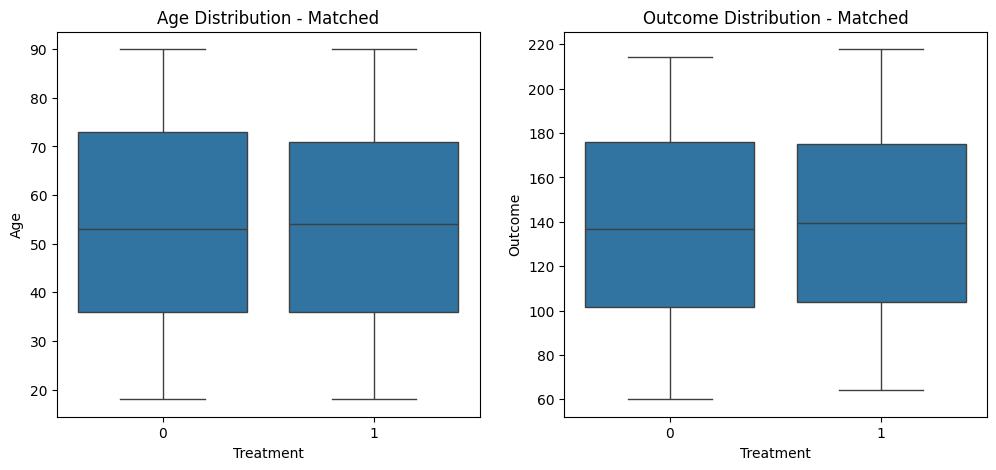

In [16]:
# Step 12: Assessing balance after matching
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.boxplot(x='Treatment', y='Age', data=matched_df, ax=axes[0])  # Visualizing the age distribution after matching
axes[0].set_title('Age Distribution - Matched')
sns.boxplot(x='Treatment', y='Outcome', data=matched_df, ax=axes[1])  # Visualizing the outcome distribution after matching
axes[1].set_title('Outcome Distribution - Matched')
plt.show()

# *** Propensity Score Matching ~ Entire Code ***

SubjectID           int64
Age                 int64
Gender              int64
BaselineHealth      int64
Treatment           int64
Outcome           float64
dtype: object
         SubjectID           Age        Gender  BaselineHealth     Treatment  \
count  10000.00000  10000.000000  10000.000000    10000.000000  10000.000000   
mean    5000.50000     53.824100      0.651000        0.807600      0.500400   
std     2886.89568     20.993524      0.476678        0.817587      0.500025   
min        1.00000     18.000000      0.000000        0.000000      0.000000   
25%     2500.75000     36.000000      0.000000        0.000000      0.000000   
50%     5000.50000     54.000000      1.000000        1.000000      1.000000   
75%     7500.25000     72.000000      1.000000        2.000000      1.000000   
max    10000.00000     90.000000      1.000000        2.000000      1.000000   

            Outcome  
count  10000.000000  
mean     138.977511  
std       42.057306  
min       59.998923  

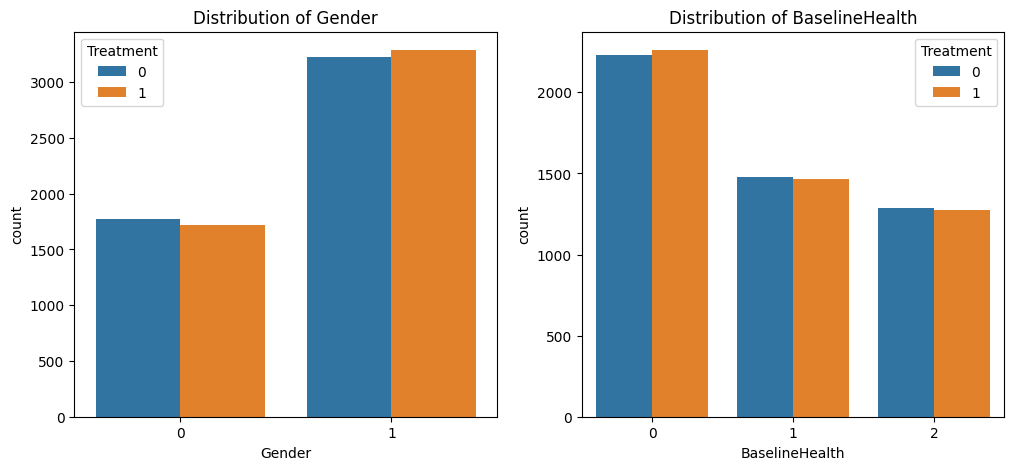

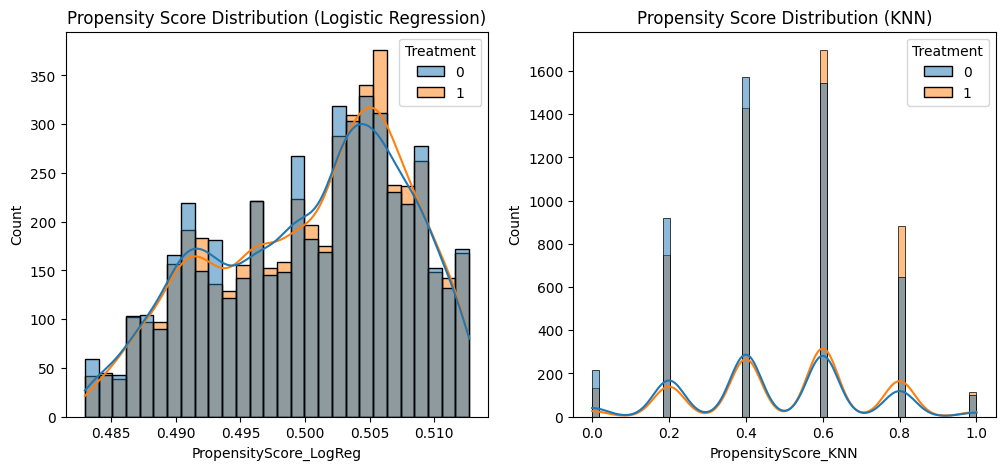

Average Treatment Effect: 0.9680754074285005
Optimization terminated successfully.
         Current function value: 0.636244
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Treatment   No. Observations:                 7502
Model:                          Logit   Df Residuals:                     7498
Method:                           MLE   Df Model:                            3
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:               3.739e-05
Time:                        16:56:24   Log-Likelihood:                -4773.1
converged:                       True   LL-Null:                       -4773.3
Covariance Type:            nonrobust   LLR p-value:                    0.9490
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7097      0.080      8.927      0.

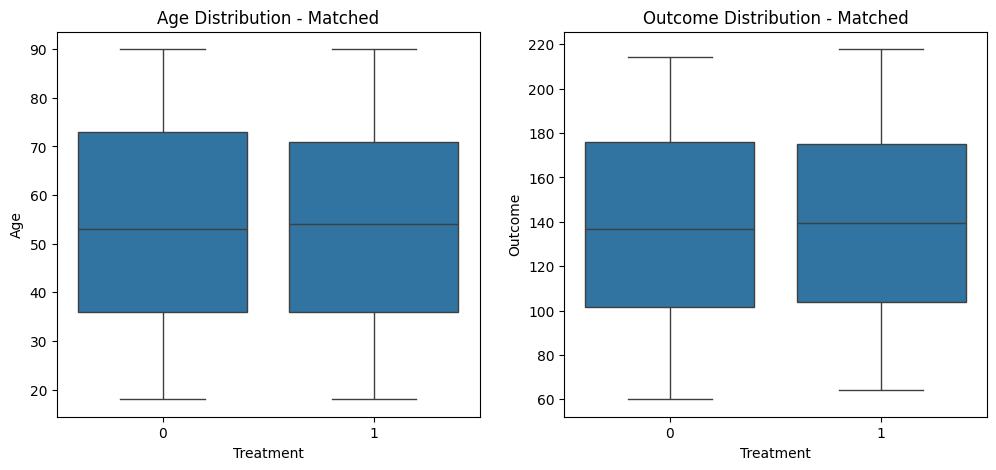

In [17]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Step 2: Importing the dataset and displaying the first 5 rows
df= pd.read_csv("/content/Propensity Score~Dataset.csv")
df.head()
# Step 3: Exploring the data~1
print(df.dtypes)  # Displaying the data types of the columns
# Step 3: Exploring the data~2
print(df.describe())  # Displaying the summary statistics of the dataset
# Step 4: Visualizing the distribution of covariates
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x='Gender', hue='Treatment', data=df, ax=axes[0])  # Visualizing the distribution of Gender
axes[0].set_title('Distribution of Gender')
sns.countplot(x='BaselineHealth', hue='Treatment', data=df, ax=axes[1])  # Visualizing the distribution of BaselineHealth
axes[1].set_title('Distribution of BaselineHealth')
plt.show()
# Step 5: Splitting the data into treatment and control groups
treatment_df = df[df["Treatment"] == 1]  # Creating a subset for the treatment group
control_df = df[df["Treatment"] == 0]  # Creating a subset for the control group
df.shape
treatment_df.shape, control_df.shape
# Step 6: Propensity score model using Logistic Regression
log_reg_model = LogisticRegression()  # Initializing the logistic regression model
X_log_reg = df[["Age", "Gender", "BaselineHealth"]]  # Independent variables for the model
y_log_reg = df["Treatment"]  # Dependent variable for the model
log_reg_model.fit(X_log_reg, y_log_reg)  # Fitting the logistic regression model

# Calculating and storing the propensity scores using Logistic Regression
df["PropensityScore_LogReg"] = log_reg_model.predict_proba(X_log_reg)[:, 1]

df["PropensityScore_LogReg"]
# Step 7: Propensity score model using KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Initializing the KNN model
X_knn = df[["Age", "Gender", "BaselineHealth"]]  # Independent variables for the KNN model
y_knn = df["Treatment"]  # Dependent variable for the KNN model
knn_model.fit(X_knn, y_knn)  # Fitting the KNN model

# Calculating and storing the propensity scores using KNN
df["PropensityScore_KNN"] = knn_model.predict_proba(X_knn)[:, 1]
df['PropensityScore_KNN']
# Step 8: Visualizing the propensity scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(df, x='PropensityScore_LogReg', hue='Treatment', kde=True, ax=axes[0])  # Visualizing the propensity score distribution from Logistic Regression
axes[0].set_title('Propensity Score Distribution (Logistic Regression)')
sns.histplot(df, x='PropensityScore_KNN', hue='Treatment', kde=True, ax=axes[1])  # Visualizing the propensity score distribution from KNN
axes[1].set_title('Propensity Score Distribution (KNN)')
plt.show()
# Step 9: Propensity Score Matching
test_size_percentage = 0.5  # Adjusting the test size percentage
treated_matched, control_matched = train_test_split(control_df, test_size=test_size_percentage, random_state=42)  # Performing the matching

matched_df = pd.concat([treatment_df, treated_matched])  # Combining the treated and matched control groups
matched_df.head()
# Step 10: Evaluating the treatment effect
effect = matched_df["Outcome"].mean() - control_df["Outcome"].mean()  # Calculating the average treatment effect
print(f"Average Treatment Effect: {effect}")  # Displaying the average treatment effect
# Step 11: Fitting the logistic regression model using statsmodels
logit_model = sm.Logit(matched_df['Treatment'], sm.add_constant(matched_df[['Age', 'Gender', 'BaselineHealth']]))  # Initializing the logistic regression model using statsmodels
logit_result = logit_model.fit()  # Fitting the logistic regression model
print(logit_result.summary())  # Displaying the summary of the logistic regression model
# Step 12: Assessing balance after matching
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.boxplot(x='Treatment', y='Age', data=matched_df, ax=axes[0])  # Visualizing the age distribution after matching
axes[0].set_title('Age Distribution - Matched')
sns.boxplot(x='Treatment', y='Outcome', data=matched_df, ax=axes[1])  # Visualizing the outcome distribution after matching
axes[1].set_title('Outcome Distribution - Matched')
plt.show()


*** The End ***